In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak

In [2]:
import tensorflow

In [3]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [4]:
X=df.drop(columns=['SOC', 'SOC_est'])
y = df.SOC
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Coefficients: 
 [ 2.42788525e-02  1.42676159e+02 -2.90116350e-01 -1.98678775e-01]
Mean squared error: 83.46
Coefficient of determination: 0.84


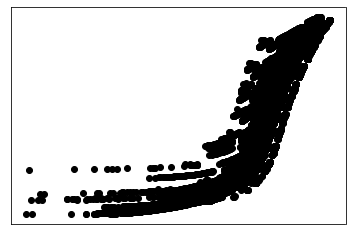

In [12]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['voltage'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
X_test

,time,voltage,curr_density,temp
598,299.0,3.785503,-29.50,308.552673
230,115.0,3.993867,-14.75,321.256434
111,55.5,3.992475,14.75,298.356028
740,370.0,3.554849,-29.50,302.274193
758,379.0,3.608663,-29.50,271.093617
...,...,...,...,...
4,2.0,3.796613,-29.50,276.021546
842,421.0,3.792672,-37.50,310.418422
182,91.0,3.854836,-14.75,308.517030
930,465.0,3.600495,-37.50,299.034196


In [9]:
y_test

598    56.141002
230    84.967558
111    78.675409
740    15.150589
758    33.898269
         ...    
4      56.943932
842    61.540175
182    63.303943
930    23.972209
474    34.879065
Name: SOC, Length: 29510, dtype: float64

In [13]:
import autokeras

In [15]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=15, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=15)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 15 Complete [00h 00m 55s]
val_loss: 5.736691951751709

Best val_loss So Far: 5.736691951751709
Total elapsed time: 00h 13m 38s
INFO:tensorflow:Oracle triggered exit
Epoch 1/15
2152/2152 [==============================] - 3s 1ms/step - loss: 43.1922 - mean_squared_error: 43.1922
Epoch 2/15
2152/2152 [==============================] - 3s 1ms/step - loss: 17.3448 - mean_squared_error: 17.3448
Epoch 3/15
2152/2152 [==============================] - 3s 1ms/step - loss: 18.9316 - mean_squared_error: 18.9316
Epoch 4/15
2152/2152 [==============================] - 3s 1ms/step - loss: 12.3984 - mean_squared_error: 12.3984
Epoch 5/15
2152/2152 [==============================] - 3s 1ms/step - loss: 10.7723 - mean_squared_error: 10.7723
Epoch 6/15
2152/2152 [==============================] - 3s 1ms/step - loss: 9.4260 - mean_squared_error: 9.4260
Epoch 7/15
2152/2152 [==============================] - 3s 1ms/step - loss: 8.4859 - mean_squared_error: 8.4859
Epoch 8/15
2152/2152 [=============

In [18]:
model = reg.export_model()

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128)               0     

In [20]:
y_test

598    56.141002
230    84.967558
111    78.675409
740    15.150589
758    33.898269
         ...    
4      56.943932
842    61.540175
182    63.303943
930    23.972209
474    34.879065
Name: SOC, Length: 29510, dtype: float64

In [21]:
predicted_y.head

array([[55.38312 ],
       [84.87816 ],
       [78.392075],
       ...,
       [63.132233],
       [24.362976],
       [36.122044]], dtype=float32)